<a href="https://colab.research.google.com/github/lim749/MORAI_AutoRace/blob/main/1_OpenCV_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# OpenCV_fundamentals

**목표**
- 이미지 입출력과 색공간(BGR↔RGB, HSV) 이해
- 블러(Blur), 에지(Canny), 이진화(Threshold), 형태학적 연산(Morphology) 체험
- 컨투어(Contour) 검출 및 경계상자(Bounding Box) 그리기
- 색상 기반 분할(HSV)
- ORB Feature를 이용한 특징점 검출 & 매칭 맛보기

In [ ]:
# ✅ 환경 점검
import sys, cv2, numpy as np, matplotlib
print("Python:", sys.version.split()[0])
print("OpenCV:", cv2.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)

Python: 3.12.11
OpenCV: 4.12.0
NumPy: 2.0.2
Matplotlib: 3.10.0



## 1) 샘플 데이터 다운로드
OpenCV 공식 리포지토리의 예제 이미지를 내려받습니다.
- `sudoku.png` : Threshold, Morphology 예제
- `smarties.png` : HSV 색상 분할 예제
- `chessboard.png` : 코너(Chessboard) 패턴
- `box.png`, `box_in_scene.png` : ORB 특징점 매칭 예제


In [6]:
# 📥 샘플 이미지 다운로드 (wget)
import os, urllib.request, pathlib

base = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/"
files = ["sudoku.png", "smarties.png", "chessboard.png", "box.png", "box_in_scene.png"]

os.makedirs("data", exist_ok=True)
for f in files:
    url = base + f
    out = f"data/{f}"
    if not os.path.exists(out):
        urllib.request.urlretrieve(url, out)
        print("Downloaded:", out)
    else:
        print("Exists:", out)

# 파일 확인
import glob
glob.glob("data/*")


Downloaded: data/sudoku.png
Downloaded: data/smarties.png
Downloaded: data/chessboard.png
Downloaded: data/box.png
Downloaded: data/box_in_scene.png


['data/sudoku.png',
 'data/chessboard.png',
 'data/box_in_scene.png',
 'data/smarties.png',
 'data/box.png']


## 2) 이미지 입출력 & 색공간 (BGR ↔ RGB, HSV)

- OpenCV(`cv2`)는 이미지를 **BGR**로 읽습니다.  
- Matplotlib는 **RGB**를 사용하므로, 표시 시 변환이 필요합니다.


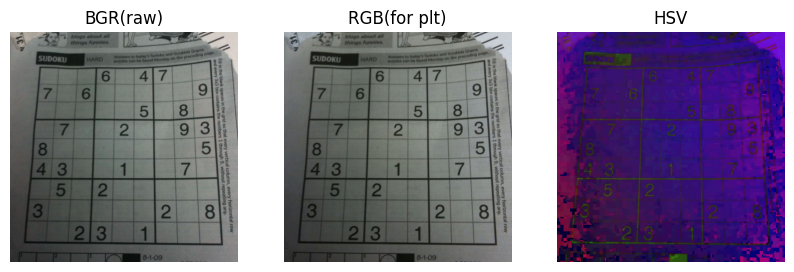

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("data/sudoku.png")  # BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB for matplotlib
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(10,6))
plt.subplot(1,3,1); plt.title("BGR(raw)"); plt.imshow(img); plt.axis("off")
plt.subplot(1,3,2); plt.title("RGB(for plt)"); plt.imshow(rgb); plt.axis("off")
plt.subplot(1,3,3); plt.title("HSV"); plt.imshow(hsv); plt.axis("off")
plt.show()



## 3) 블러(Blur) & 에지(Canny)

- **Gaussian Blur**: 노이즈를 줄여 에지 검출을 안정화합니다.  
- **Canny Edge**: 두 개의 임계값(`threshold1`, `threshold2`)로 에지를 검출합니다.


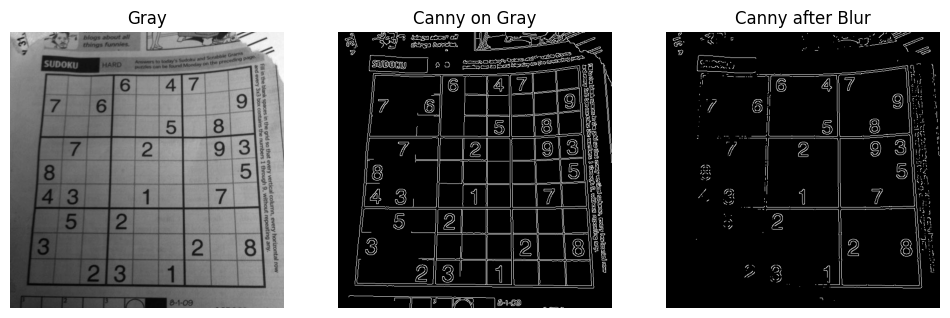

👉 미션: Canny 임계값을 바꿔가며 결과 차이를 관찰해보세요.


In [11]:
import cv2, numpy as np, matplotlib.pyplot as plt

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 1.0)
edges1 = cv2.Canny(gray, 80, 160)
edges2 = cv2.Canny(blur, 160, 160)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.title("Gray"); plt.imshow(gray, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title("Canny on Gray"); plt.imshow(edges1, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Canny after Blur"); plt.imshow(edges2, cmap="gray"); plt.axis("off")
plt.show()

print("👉 미션: Canny 임계값을 바꿔가며 결과 차이를 관찰해보세요.")



## 4) 이진화(Threshold) & 형태학적 연산(Morphology)

- **Otsu Threshold**: 히스토그램 기반 자동 임계값 선정  
- **Morphology**: Erode(침식), Dilate(팽창), Open(침식→팽창), Close(팽창→침식)


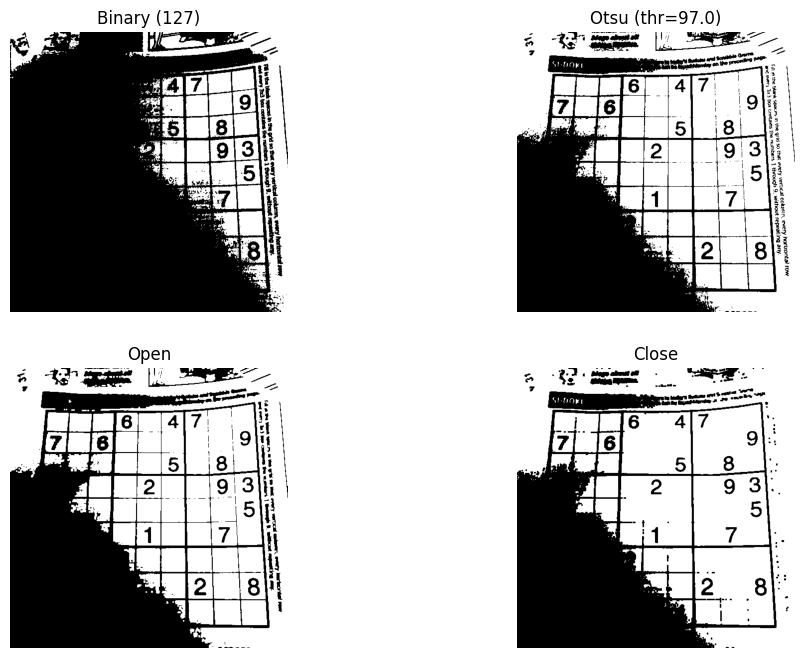

👉 미션: 커널 크기를 (5,5) 등으로 바꾸고 Open/Close 차이를 관찰하세요.


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 글로벌 이진화 & Otsu
ret1, th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Morphology 커널
kernel = np.ones((3,3), np.uint8)
open_ = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel, iterations=1)
close_ = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.title("Binary (127)"); plt.imshow(th1, cmap="gray"); plt.axis("off")
plt.subplot(2,2,2); plt.title(f"Otsu (thr={ret2:.1f})"); plt.imshow(th2, cmap="gray"); plt.axis("off")
plt.subplot(2,2,3); plt.title("Open"); plt.imshow(open_, cmap="gray"); plt.axis("off")
plt.subplot(2,2,4); plt.title("Close"); plt.imshow(close_, cmap="gray"); plt.axis("off")
plt.show()

print("👉 미션: 커널 크기를 (5,5) 등으로 바꾸고 Open/Close 차이를 관찰하세요.")



## 5) 컨투어(Contour) 검출 & 경계상자(Bounding Box)

- 바이너리 이미지에서 객체의 외곽선(Contour)을 찾고, 사각형 박스를 그립니다.


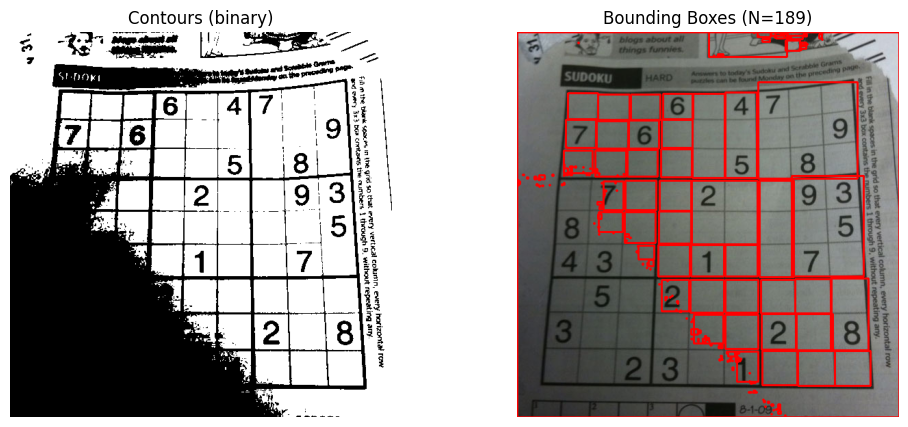

👉 미션: RETR_EXTERNAL → RETR_TREE로 바꾸고 내부 구조가 있는 이미지에서 차이를 관찰해보세요.


In [ ]:
# 컨투어는 흰색 포그라운드에서 검출됨
bin_img = th2.copy()

contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rgb_contour = cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)
rgb_contour = cv2.cvtColor(rgb_contour, cv2.COLOR_BGR2RGB)
vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).copy()

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(vis, (x,y), (x+w, y+h), (255,0,0), 2)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.title("Contours (binary)"); plt.imshow(rgb_contour); plt.axis("off")
plt.subplot(1,2,2); plt.title(f"Bounding Boxes (N={len(contours)})"); plt.imshow(vis); plt.axis("off")
plt.show()

print("👉 미션: RETR_EXTERNAL → RETR_TREE로 바꾸고 내부 구조가 있는 이미지에서 차이를 관찰해보세요.")



## 6) 색상 기반 분할 (HSV)

- 특정 색상 범위를 마스크로 추출해 물체를 분리합니다.
- 예시: `smarties.png`에서 **오렌지색** 추출.


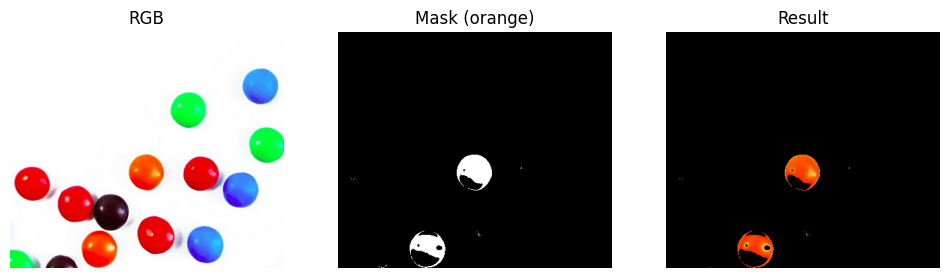

👉 미션: 다른 색(예: 초록, 파랑)의 HSV 범위를 찾아서 분할해보세요.


In [ ]:
import numpy as np, cv2, matplotlib.pyplot as plt

src = cv2.imread("data/smarties.png")
rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 오렌지색 범위(예시) — 필요시 조정
lower = np.array([5, 120, 50])   # H,S,V
upper = np.array([20, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
masked = cv2.bitwise_and(rgb, rgb, mask=mask)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.title("RGB"); plt.imshow(rgb); plt.axis("off")
plt.subplot(1,3,2); plt.title("Mask (orange)"); plt.imshow(mask, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Result"); plt.imshow(masked); plt.axis("off")
plt.show()

print("👉 미션: 다른 색(예: 초록, 파랑)의 HSV 범위를 찾아서 분할해보세요.")


## 7) ORB 특징점(Feature) 검출 & 매칭

- **ORB**(Oriented FAST and Rotated BRIEF): 빠르고 가벼운 특징점/디스크립터  
- 두 이미지(`box.png` vs `box_in_scene.png`) 간 특징 매칭을 시각화합니다.


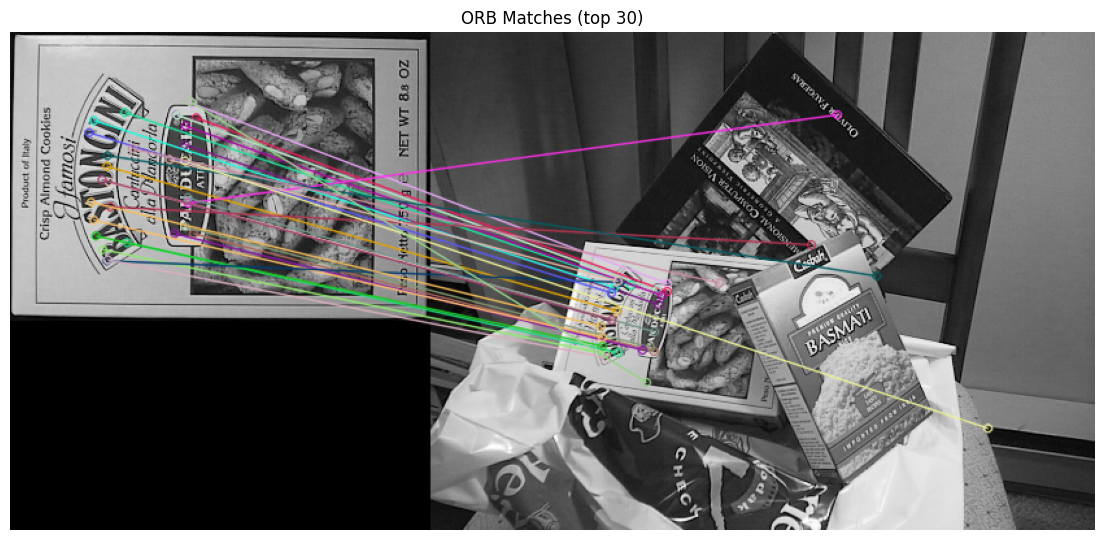

👉 미션: nfeatures 값을 200/1000으로 바꿔 매칭 수와 품질 변화를 비교해보세요.


In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

img1 = cv2.imread('data/box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/box_in_scene.png', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
matched = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(14,7))
plt.imshow(matched, cmap="gray"); plt.title("ORB Matches (top 30)"); plt.axis("off")
plt.show()

print("👉 미션: nfeatures 값을 200/1000으로 바꿔 매칭 수와 품질 변화를 비교해보세요.")